In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
os.chdir("D:/CDAC/Machine Learning")
df = pd.read_csv('admissions.csv')

In [3]:
df

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894
...,...,...,...
639,1,3.381359,720.718438
640,1,3.083956,556.918021
641,1,3.114419,734.297679
642,1,3.549012,604.697503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   644 non-null    int64  
 1   gpa     644 non-null    float64
 2   gre     644 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


In [5]:
df.isnull().sum()

admit    0
gpa      0
gre      0
dtype: int64

In [6]:
df.shape

(644, 3)

## GPA

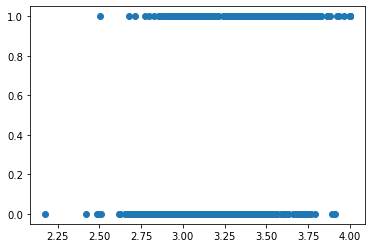

In [7]:
plt.scatter(df['gpa'],df['admit'])

In [8]:
# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df[['gpa']],df[['admit']])


LinearRegression()

In [9]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logicm = LogisticRegression()
logicm.fit(df[['gpa']],df[['admit']])

C:\Users\Vibhishan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [10]:
pred_prob_gpa = logicm.predict_proba(df[['gpa']])

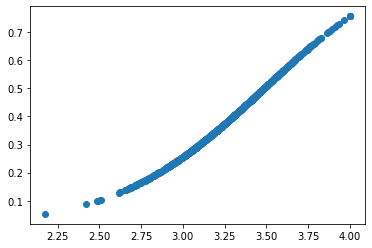

In [11]:
plt.scatter(df['gpa'],pred_prob_gpa[:,1])

In [12]:
fitted_gpa = logicm.predict(df[['gpa']])

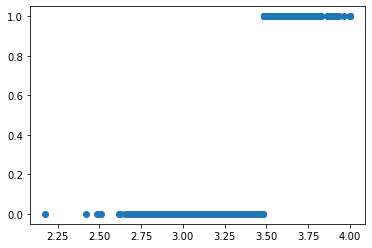

In [13]:
plt.scatter(df['gpa'],fitted_gpa)

## GRE 

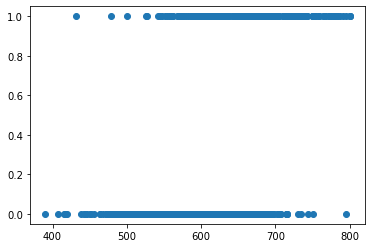

In [14]:
plt.scatter(df['gre'],df['admit'])

In [15]:
# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df[['gre']],df[['admit']])


LinearRegression()

In [16]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logicm = LogisticRegression()
logicm.fit(df[['gre']],df[['admit']])

C:\Users\Vibhishan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [17]:
pred_prob_gre = logicm.predict_proba(df[['gre']])

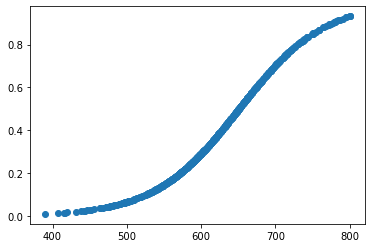

In [18]:
plt.scatter(df['gre'],pred_prob_gre[:,1])

In [19]:
fitted_gre = logicm.predict(df[['gre']])

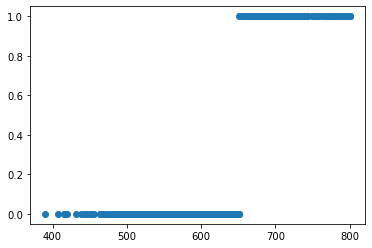

In [20]:
plt.scatter(df['gre'],fitted_gre)

## Comparing the performance of model

In [21]:
sum((fitted_gpa==df['admit'])/df.shape[0])

0.6847826086956457

In [22]:
sum((fitted_gre==df['admit'])/df.shape[0])

0.7267080745341543

## Combine Model

In [23]:
logicm2 = LogisticRegression()
logicm2.fit(df[['gpa','gre']],df['admit'])

LogisticRegression()

In [24]:
pred_prob_gregpa = logicm2.predict_log_proba(df[['gpa','gre']])

In [25]:
fitted_gregpa = logicm2.predict(df[['gpa','gre']])

In [26]:
# Accuracy 
sum((fitted_gregpa == df['admit'])/df.shape[0])

0.7872670807453335

## GPA and GRE can predict admission chances in more better than only GPA or GRE